In [1]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for TEG is collected.

In [6]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/thermodynamics/heatcapacity/methane.csv')
expdata_df

,ID,Cp gas(J/mol*K),Temperature (K),Reference
0,1,33.51,200.00,"Gurvich, Veyts, et al., 1989"
1,2,35.69,298.15,"Gurvich, Veyts, et al., 1989"
2,3,35.76,300.00,"Gurvich, Veyts, et al., 1989"
3,4,40.63,400.00,"Gurvich, Veyts, et al., 1989"
4,5,46.63,500.00,"Gurvich, Veyts, et al., 1989"
5,6,52.74,600.00,"Gurvich, Veyts, et al., 1989"
6,7,58.60,700.00,"Gurvich, Veyts, et al., 1989"
7,8,64.08,800.00,"Gurvich, Veyts, et al., 1989"
8,9,69.14,900.00,"Gurvich, Veyts, et al., 1989"
9,10,73.75,1000.00,"Gurvich, Veyts, et al., 1989"


<Figure size 640x480 with 0 Axes>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


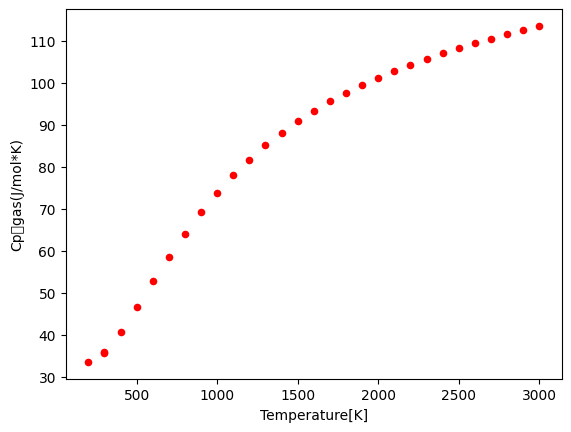

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='Temperature (K)', y='Cp gas(J/mol*K)', kind='scatter',ylabel='Cp	gas(J/mol*K)', xlabel='Temperature[K]',color='red')

plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

<Figure size 640x480 with 0 Axes>

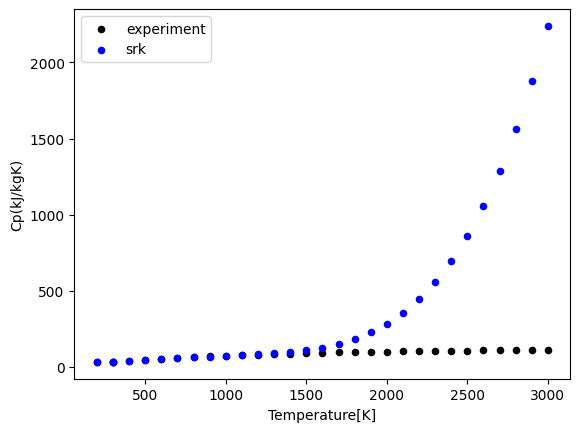

In [13]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('srk')
fluid1.addComponent('methane', 1.0)
fluid1.setTemperature(15.0, 'C')
fluid1.setPressure(1.0, 'bara')

def heatcap(input):
    fluid1.setTemperature(input[0], 'K')
    TPflash(fluid1)
    fluid1.initProperties()
    return fluid1.getPhase('gas').getCp('J/molK')

temperatures = expdata_df['Temperature (K)'].values.tolist()
input = zip(temperatures)
cP_res = [heatcap(inp) for inp in input]

dataWithExperiment = expdata_df.assign(cP_res = cP_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='Temperature (K)', y='Cp gas(J/mol*K)', kind='scatter',ylabel='Cp(kJ/kgK)', xlabel='Temperature[K]',color='black')	
dataWithExperiment.plot(ax=plot1, x='Temperature (K)', y='cP_res', kind='scatter',ylabel='Cp(kJ/kgK)', xlabel='Temperature[K]',color='blue')	
plt.legend(['experiment', 'srk'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting